In [135]:
import pandas as pd
import numpy as np
import scipy as sp
import sys
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib.patches import Ellipse
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [137]:
#Выбранный датасет представляет собой набор медицинских данных по кардиологии
#Данные включают в себя различные медицинские показатели, такие как давление, уровень сахара и тд
#Основной таргетный параметр, который нас интересует, показывает, находится ли обследуемый человвек
#В группе риска по сердечно-сосудистым заболеваниям
#Объектами в данном датасете являются пациенты

In [138]:
#Чтение базы данных

csv_file_path = 'Cardiovascular_Disease_Dataset.csv' 

train_df = pd.read_csv(csv_file_path, low_memory=False) 

print(train_df) 

#вывод на экран всей базы данных

     patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0       103368   53       1          2        171                0   
1       119250   40       1          0         94              229   
2       119372   49       1          2        133              142   
3       132514   43       1          0        138              295   
4       146211   31       1          1        199                0   
..         ...  ...     ...        ...        ...              ...   
995    9949544   48       1          2        139              349   
996    9953423   47       1          3        143              258   
997    9965859   69       1          0        156              434   
998    9988507   45       1          1        186              417   
999    9990855   25       1          0        158              270   

     fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                    0                1           147              0      5.3 

In [139]:
# Срез данных head
print(train_df.head(20))

    patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0      103368   53       1          2        171                0   
1      119250   40       1          0         94              229   
2      119372   49       1          2        133              142   
3      132514   43       1          0        138              295   
4      146211   31       1          1        199                0   
5      148462   24       1          1        173                0   
6      168686   79       1          2        130              240   
7      170498   52       1          0        127              345   
8      188225   62       1          0        121              357   
9      192523   61       0          0        190              181   
10     201030   59       0          1        190              529   
11     208877   58       1          2        192              409   
12     223295   27       1          0        129              135   
13     226481   59       1        

In [140]:
# shape
print(train_df.shape)

(1000, 14)


In [141]:
# Срез данных head
print(train_df.head(20))

    patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0      103368   53       1          2        171                0   
1      119250   40       1          0         94              229   
2      119372   49       1          2        133              142   
3      132514   43       1          0        138              295   
4      146211   31       1          1        199                0   
5      148462   24       1          1        173                0   
6      168686   79       1          2        130              240   
7      170498   52       1          0        127              345   
8      188225   62       1          0        121              357   
9      192523   61       0          0        190              181   
10     201030   59       0          1        190              529   
11     208877   58       1          2        192              409   
12     223295   27       1          0        129              135   
13     226481   59       1        

In [142]:
# Стастические сводка методом describe
print(train_df.describe())

          patientid         age       gender    chestpain    restingBP  \
count  1.000000e+03  1000.00000  1000.000000  1000.000000  1000.000000   
mean   5.048704e+06    49.24200     0.765000     0.980000   151.747000   
std    2.895905e+06    17.86473     0.424211     0.953157    29.965228   
min    1.033680e+05    20.00000     0.000000     0.000000    94.000000   
25%    2.536440e+06    34.00000     1.000000     0.000000   129.000000   
50%    4.952508e+06    49.00000     1.000000     1.000000   147.000000   
75%    7.681877e+06    64.25000     1.000000     2.000000   181.000000   
max    9.990855e+06    80.00000     1.000000     3.000000   200.000000   

       serumcholestrol  fastingbloodsugar  restingrelectro  maxheartrate  \
count      1000.000000        1000.000000      1000.000000   1000.000000   
mean        311.447000           0.296000         0.748000    145.477000   
std         132.443801           0.456719         0.770123     34.190268   
min           0.000000       

In [143]:
# Распределение по атрибуту target
print(train_df.groupby('target').size())

target
0    420
1    580
dtype: int64


In [144]:
train_df = train_df.drop(columns=['patientid', 'chestpain', 'restingrelectro', 'slope', 'noofmajorvessels', 'exerciseangia'], axis=1) 
predictors = ['age', 'gender', 'restingBP', 'serumcholestrol', 'fastingbloodsugar', 'maxheartrate', 'oldpeak'] 
outcome = 'target'
print(train_df)

     age  gender  restingBP  serumcholestrol  fastingbloodsugar  maxheartrate  \
0     53       1        171                0                  0           147   
1     40       1         94              229                  0           115   
2     49       1        133              142                  0           202   
3     43       1        138              295                  1           153   
4     31       1        199                0                  0           136   
..   ...     ...        ...              ...                ...           ...   
995   48       1        139              349                  0           183   
996   47       1        143              258                  1            98   
997   69       1        156              434                  1           196   
998   45       1        186              417                  0           117   
999   25       1        158              270                  0           143   

     oldpeak  target  
0   

In [145]:
new_record = train_df.loc[0:0, predictors] 
X = train_df.loc[1:, predictors] 
y = train_df.loc[1:, outcome]

In [146]:
knn = KNeighborsClassifier(n_neighbors=200) 
knn.fit(X, y) 
knn.predict(new_record)
print(knn.predict_proba(new_record))

[[0.43 0.57]]


c:\Users\tukar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tukar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tukar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tukar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

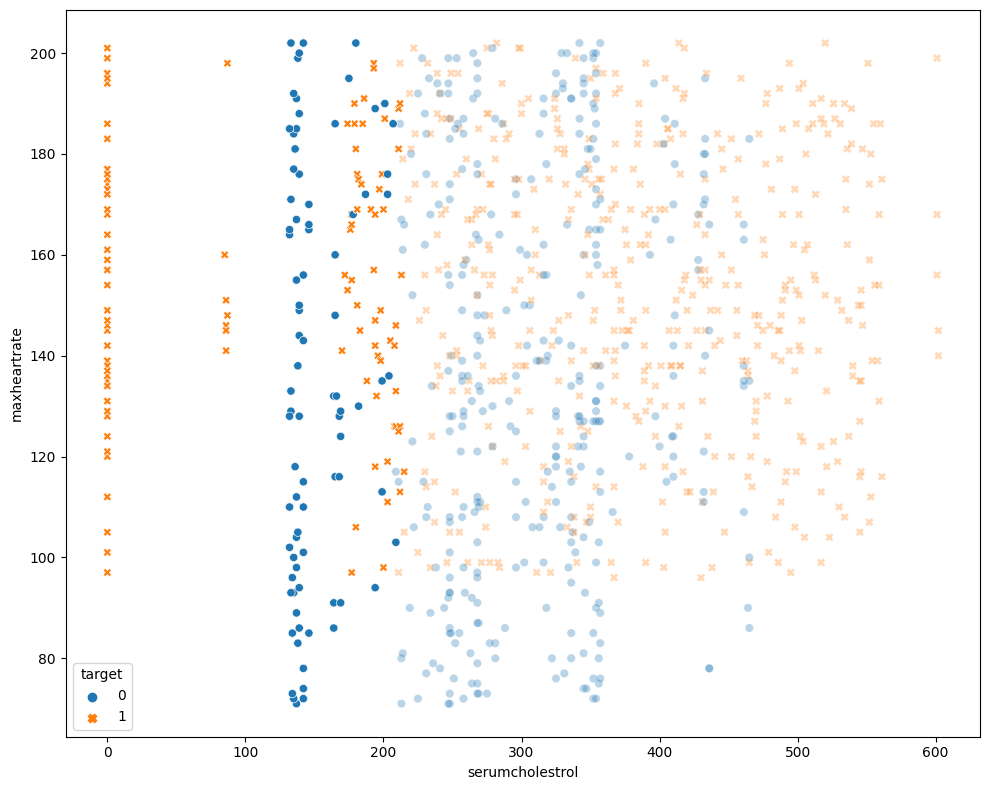

In [147]:
#Видим что вероятность быть в зоне риска составляет 57%
#Далее настраиваем алгоритм k-NN на поиск и использование 200 ближайших соседей, чтобы оценить состояние пациента. 
#Для наглядности выводим 200 первых соседей

nbrs = knn.kneighbors(new_record)
maxDistance = np.max(nbrs[0][0])

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x = 'serumcholestrol', y = 'maxheartrate', style = 'target', 
                hue='target', data=train_df, alpha=0.3, ax=ax)
sns.scatterplot(x = 'serumcholestrol', y = 'maxheartrate', style = 'target', 
                hue = 'target', 
                data = pd.concat([train_df.loc[0:0, :], train_df.loc[nbrs[1][0] + 1,:]]), 
                ax = ax, legend=False)
ellipse = Ellipse(xy = new_record.values[0], 
                  width = 2 * maxDistance, height = 2 * maxDistance,
                  edgecolor = 'black', fc = 'None', lw = 1)

plt.tight_layout()
plt.show()

#Для наглядности графика возьмем 2 наиболее показательных параметра.

In [148]:
#На графике видим распределение 200 пациентов
#Для наглядности графиков далее будем использовать 4 параметра

dataset = train_df.drop(columns=['gender', 'fastingbloodsugar', 'oldpeak', 'target']) 
predictors = ['serumcholestrol','age','maxheartrate','restingBP'] 
print(dataset)

     age  restingBP  serumcholestrol  maxheartrate
0     53        171                0           147
1     40         94              229           115
2     49        133              142           202
3     43        138              295           153
4     31        199                0           136
..   ...        ...              ...           ...
995   48        139              349           183
996   47        143              258            98
997   69        156              434           196
998   45        186              417           117
999   25        158              270           143

[1000 rows x 4 columns]


NameError: name 'pyplot' is not defined

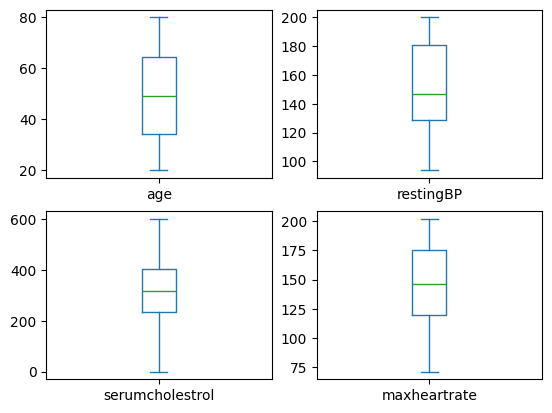

In [149]:
# Диаграмма размаха
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

NameError: name 'pyplot' is not defined

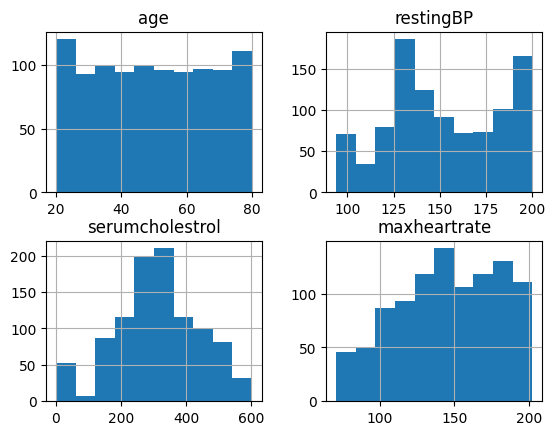

In [150]:
# Гистограмма распределения атрибутов датасета
dataset.hist()
pyplot.show()

NameError: name 'pyplot' is not defined

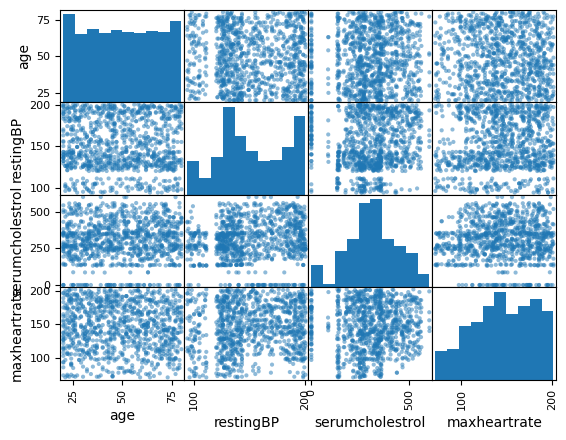

In [ ]:
#Матрица диаграмм рассеяния
scatter_matrix(dataset)
pyplot.show()

In [ ]:
dataset = train_df.drop(columns=['gender', 'fastingbloodsugar', 'oldpeak']) 

# Разделение датасета на обучающую и контрольную выборки
array = dataset.values

# Выбор первых 4-х столбцов 
X = array[:,0:4]

# Выбор 5-го столбца 
y = array[:,4]

# Разделение X и y на обучающую и контрольную выборки 
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
# Загружаем алгоритмы модели
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# оцениваем модель на каждой итерации
results = []
names = []

for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.757500 (0.060519)
LDA: 0.758750 (0.060738)
KNN: 0.795000 (0.047828)
CART: 0.808750 (0.050327)
NB: 0.802500 (0.052082)
SVM: 0.576250 (0.003750)


In [ ]:
# Сравниванием алгоритмы
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

NameError: name 'pyplot' is not defined

In [ ]:
# Создаем прогноз Логистической регрессии на контрольной выборке
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [ ]:
# Оцениваем прогноз
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.775
[[56 25]
 [20 99]]
              precision    recall  f1-score   support

           0       0.74      0.69      0.71        81
           1       0.80      0.83      0.81       119

    accuracy                           0.78       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.78      0.77       200



In [ ]:
# Создаем прогноз Линейного дискриминантного анализа на контрольной выборке
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [ ]:
# Оцениваем прогноз
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.77
[[60 21]
 [25 94]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.72        81
           1       0.82      0.79      0.80       119

    accuracy                           0.77       200
   macro avg       0.76      0.77      0.76       200
weighted avg       0.77      0.77      0.77       200



In [ ]:
# Создаем прогноз Метода k ближайших соседей на контрольной выборке
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [ ]:
# Оцениваем прогноз
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.775
[[64 17]
 [28 91]]
              precision    recall  f1-score   support

           0       0.70      0.79      0.74        81
           1       0.84      0.76      0.80       119

    accuracy                           0.78       200
   macro avg       0.77      0.78      0.77       200
weighted avg       0.78      0.78      0.78       200



In [ ]:
# Создаем прогноз Метода Классификация и регрессия с помощью деревьев на контрольной выборке
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [ ]:
# Оцениваем прогноз
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.77
[[62 19]
 [27 92]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.73        81
           1       0.83      0.77      0.80       119

    accuracy                           0.77       200
   macro avg       0.76      0.77      0.76       200
weighted avg       0.78      0.77      0.77       200



In [ ]:
# Создаем прогноз Наивного байесовского классификатора на контрольной выборке
model = GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [ ]:
# Оцениваем прогноз
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.81
[[67 14]
 [24 95]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        81
           1       0.87      0.80      0.83       119

    accuracy                           0.81       200
   macro avg       0.80      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



In [ ]:
# Создаем прогноз Метода опорных векторов на контрольной выборке
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [ ]:
# Оцениваем прогноз
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.595
[[  0  81]
 [  0 119]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        81
           1       0.59      1.00      0.75       119

    accuracy                           0.59       200
   macro avg       0.30      0.50      0.37       200
weighted avg       0.35      0.59      0.44       200



c:\Users\tukar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tukar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tukar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
#На данный момент лучшие результаты именно у Наивного Байессовоского классификатора

In [ ]:
#Бинаризация
#При бинаризации числовых атрибутов сделаем деление параметров так, 
#чтобы создать 2 примерно равные группы

df_bin = pd.DataFrame()
#1
df_bin['age>50'] = train_df['age'] > 50
df_bin['age<=50'] = train_df['age'] <= 50
#2
df_bin['serumcholestrol>350'] = train_df['serumcholestrol'] > 350
df_bin['serumcholestrol<=350'] = train_df['serumcholestrol'] <= 350
#3
df_bin['maxheartrate>65'] = train_df['maxheartrate'] > 65
df_bin['maxheartrate<=65'] = train_df['maxheartrate'] <= 65
#4
df_bin['restingBP>150'] = train_df['restingBP'] > 150
df_bin['restingBP<=150'] = train_df['restingBP'] <= 150
#5
df_bin['oldpeak>3'] = train_df['oldpeak'] > 3
df_bin['oldpeak<=3'] = train_df['oldpeak'] <= 3


df_bin['target'] = train_df['target'] == 1

In [ ]:
df_bin['sample_id'] = np.arange(0, df_bin.shape[0], 1).astype(str)
df_bin['id'] = df_bin['sample_id'].apply(lambda x: 'h' + x)
df_bin.drop(columns=['sample_id'], inplace=True)
df_bin=df_bin.set_index('id')
df_bin.sample()

,age>50,age<=50,serumcholestrol>350,serumcholestrol<=350,maxheartrate>65,maxheartrate<=65,restingBP>150,restingBP<=150,oldpeak>3,oldpeak<=3,target
id,,,,,,,,,,,
h616,False,True,False,True,True,False,True,False,True,False,True


In [ ]:
#Разделяем данные на трэйн и тест
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, accuracy_score, classification_report
y_feat = 'target'
df_train, df_test = train_test_split(df_bin, train_size=0.7, random_state=0)
df_test.sample()

,age>50,age<=50,serumcholestrol>350,serumcholestrol<=350,maxheartrate>65,maxheartrate<=65,restingBP>150,restingBP<=150,oldpeak>3,oldpeak<=3,target
id,,,,,,,,,,,
h332,False,True,False,True,True,False,False,True,False,True,False


In [ ]:
X_train, y_train = df_train.drop(y_feat, axis=1), df_train[y_feat]
X_test, y_test = df_test.drop(y_feat, axis=1), df_test[y_feat]
X_train.sample()

,age>50,age<=50,serumcholestrol>350,serumcholestrol<=350,maxheartrate>65,maxheartrate<=65,restingBP>150,restingBP<=150,oldpeak>3,oldpeak<=3
id,,,,,,,,,,
h699,False,True,True,False,True,False,True,False,True,False
